In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv('/Users/jordanwegner/Desktop/nba2/03_data/box_score_four_factors.csv')
gids = pd.read_csv('/Users/jordanwegner/Desktop/nba2/03_data/game_ids.csv')
pwins = pd.read_csv('/Users/jordanwegner/Desktop/nba2/03_data/playoff_wins.csv')
# average height, weight, and experience
rs = pd.read_csv('/Users/jordanwegner/Desktop/nba2/03_data/rosters.csv')
# need seasons to get the right id set up 
seasons = pd.read_csv('/Users/jordanwegner/Desktop/nba2/03_data/seasons.csv')

In [3]:
df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT
0,G0020000362,1610612748,MIA,Miami,1477,Bruce Bowen,Bruce,F,NaN,32.000000:46,0.302,0.396,0.185,0.216,0.319,0.213,0.314,0.387
1,G0020000362,1610612748,MIA,Miami,193,Anthony Mason,Anthony,F,NaN,36.000000:46,0.294,0.373,0.211,0.184,0.425,0.226,0.268,0.346
2,G0020000362,1610612748,MIA,Miami,258,Brian Grant,Brian,C,NaN,34.000000:22,0.348,0.457,0.225,0.206,0.410,0.320,0.290,0.448
3,G0020000362,1610612748,MIA,Miami,224,Eddie Jones,Eddie,G,NaN,40.000000:23,0.345,0.218,0.231,0.184,0.408,0.350,0.246,0.424
4,G0020000362,1610612748,MIA,Miami,896,Tim Hardaway,Tim,G,NaN,28.000000:52,0.288,0.475,0.239,0.233,0.413,0.225,0.302,0.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682836,G0022200161,1610612753,ORL,Orlando,1628964,Mo Bamba,Mo,NaN,NaN,24.000000:27,0.527,0.243,0.225,0.214,0.489,0.191,0.041,0.154
682837,G0022200161,1610612753,ORL,Orlando,1630181,R.J. Hampton,R.J.,NaN,NaN,8.000000:33,0.682,0.000,0.313,0.000,0.500,0.150,0.000,0.200
682838,G0022200161,1610612753,ORL,Orlando,1631216,Caleb Houstan,Caleb,NaN,NaN,26.000000:25,0.550,0.325,0.174,0.167,0.402,0.239,0.079,0.138
682839,G0022200161,1610612753,ORL,Orlando,1629678,Admiral Schofield,Admiral,NaN,NaN,0.000000:33,1.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000


In [4]:
import pandas as pd 

def averaged_player_data(data,game_ids,year,season_data,roster_data):
    # takes the raw data and the game_ids as inputs
    # will need to update if new columns are added 
    # player data is averaged by team and season
    # then, the averaged player data is averaged by team and season 
    
    print("player data shape: {}".format(data.shape))
    
    print("merging seasons to the player data via game_id data frame") 
    df2 = data.merge(gids[['GAME_ID','SEASON_YEAR']],how='left',on='GAME_ID').drop_duplicates()
    print("dropping duplicates") 
    print("new shape (should match the old one): {}".format(df2.shape))
    drops = ['GAME_ID','TEAM_ABBREVIATION','TEAM_CITY','PLAYER_NAME','NICKNAME','START_POSITION','COMMENT']
    avg_columns = ['MIN','EFG_PCT','FTA_RATE','TM_TOV_PCT','OREB_PCT','OPP_FTA_RATE','OPP_TOV_PCT','OPP_OREB_PCT']
    print("columns to drop:")
    print(drops)
    print("columns to average:")
    print(avg_columns)
    df3 = df2.drop(drops,axis=1).copy()
    print("Formatting MIN column to float") 
    df3['MIN'] = df3['MIN'].astype(str)
    df3['MIN'] = [x.split(':')[0] for x in df3['MIN']]
    df3['MIN'] = df3['MIN'].mask(df3['MIN']=='nan',0)
    df3['MIN'] = df3['MIN'].astype(float)
    print("creating ID column") 
    df3['ID'] = df3['TEAM_ID'].astype(str)+'_'+df3['PLAYER_ID'].astype(str)+'_'+df3['SEASON_YEAR'].astype(str)
    df3.drop(['TEAM_ID','PLAYER_ID','SEASON_YEAR'],axis=1,inplace=True)
    print("averaging by team, player, and season IDs") 
    df_avg = df3.groupby('ID').mean().reset_index()
    #print("creating the team and season id column") 
    #id_split = df_avg['ID'].str.split('_')
    #team_id = [x[0] for x in id_split]
    #season_id = [x[2] for x in id_split]
    #team_season = [x+'_'+y for x,y in zip(team_id,season_id)]
    #df_avg['TEAM_SEASON'] = team_season
    #df_avg.drop('ID',axis=1,inplace=True)
    #print("averaging by team and season") 
    #df_avg2 = df_avg.groupby('TEAM_SEASON').mean().reset_index()
    
    print('adding in next season rosters')
    rs2 = roster_data.merge(season_data,how='left',left_on='SEASON',right_on='y1')
    rs2 = rs2[rs2['SEASON']==2023][['TeamID','PLAYER_ID','id']].copy()
    rs2['ID'] = rs2['TeamID'].astype(str)+'_'+rs2['PLAYER_ID'].astype(str)+'_'+rs2['id'].astype(str)
    new_season_df = pd.DataFrame({'ID':rs2['ID'],
                       'MIN':np.repeat(np.nan,len(rs2['ID'])),
                       'EFG_PCT':np.repeat(np.nan,len(rs2['ID'])),
                       'FTA_RATE':np.repeat(np.nan,len(rs2['ID'])),
                       'TM_TOV_PCT':np.repeat(np.nan,len(rs2['ID'])),
                       'OREB_PCT':np.repeat(np.nan,len(rs2['ID'])),
                       'OPP_EFG_PCT':np.repeat(np.nan,len(rs2['ID'])),
                       'OPP_FTA_RATE':np.repeat(np.nan,len(rs2['ID'])),
                       'OPP_TOV_PCT':np.repeat(np.nan,len(rs2['ID'])),
                       'OPP_OREB_PCT':np.repeat(np.nan,len(rs2['ID']))})
    avg_final = pd.concat([df_avg,new_season_df])
    
    
    return avg_final

import pandas as pd 

def lagged_data(data):
    # takes the averaged data as input 
    # will need to update if new columns are added 
    
    hold = data.copy()
    
    print("averaged data shape: {}".format(data.shape))
    
    print("creating the team, season, and player id") 
    ids = data['ID'].str.split('_')
    team_id = [x[0] for x in ids]
    player_id = [x[1] for x in ids]
    season_id = [x[2] for x in ids]
    data['TEAM_ID'] = team_id
    data['PLAYER_ID'] = player_id
    data['SEASON_YEAR'] = season_id
    data['PLAYER_SEASON'] = data['PLAYER_ID'] + '_' + data['SEASON_YEAR']
    data.drop(['TEAM_ID','PLAYER_ID','SEASON_YEAR'],axis=1)
    
    print('averaging data for those players who were traded')
    avg_cols = ['PLAYER_SEASON','MIN','EFG_PCT','FTA_RATE','TM_TOV_PCT','OREB_PCT','OPP_EFG_PCT','OPP_FTA_RATE','OPP_TOV_PCT','OPP_OREB_PCT']
    data_temp = data[avg_cols].copy()
    
    noavg_cols = []
    for x in list(data.columns):
        if x not in avg_cols:
            noavg_cols.append(x)
    
    print('no averaging columns:')
    print(noavg_cols)
    noavg = data[noavg_cols].copy()
    
    print('creating the average')
    data_temp = data_temp.groupby('PLAYER_SEASON').mean().reset_index()
    
    data = data_temp.copy()
    
    lag_cols = ['PLAYER_ID','MIN','EFG_PCT','FTA_RATE','TM_TOV_PCT','OREB_PCT','OPP_EFG_PCT','OPP_FTA_RATE','OPP_TOV_PCT','OPP_OREB_PCT']
    
    print('recreating SEASON_YEAR and PLAYER_ID')
    ids = data['PLAYER_SEASON'].str.split('_')
    player_id = [x[0] for x in ids]
    season_id = [x[1] for x in ids]
    data['PLAYER_ID'] = player_id
    data['SEASON_YEAR'] = season_id
    
    print("sorting data") 
    data = data.sort_values(['PLAYER_ID','SEASON_YEAR']).copy()

    print("lag columns and PLAYER_ID:") 
    print(lag_cols)
    
    nolag_cols = []
    for x in list(data.columns):
        if x not in lag_cols:
            nolag_cols.append(x)
    
    tolag = data[lag_cols].copy()
    nolag = data[nolag_cols].copy()
    
    print("no lag columns")
    print(nolag.columns)
    
    print("lagging the data") 
    lagged = tolag.groupby('PLAYER_ID').shift(1)
    
    print("adding LAST_YEAR_ prefix to column names")
    lagged = lagged.add_prefix("LS_")
    
    print('adding back the other columns')
    lagged_and = pd.concat([lagged,nolag],axis=1)
    
    print('recreating PLAYER_ID')
    ids = lagged_and['PLAYER_SEASON'].str.split('_')
    player_id = [x[0] for x in ids]
    lagged_and['PLAYER_ID'] = player_id
    
    print('adding back the previous year team')
    ids = hold['ID'].str.split('_')
    team_id = [x[0] for x in ids]
    player_id = [x[1] for x in ids]
    season_id = [x[2] for x in ids]
    hold['TEAM_ID'] = team_id
    hold['PLAYER_ID'] = player_id
    hold['SEASON_YEAR'] = season_id
    hold['PLAYER_SEASON'] = hold['PLAYER_ID'] + '_' + hold['SEASON_YEAR']
    hold.drop(['TEAM_ID','PLAYER_ID','SEASON_YEAR'],axis=1)
    
    hold = hold.sort_values('PLAYER_SEASON')
    hold = hold.groupby('PLAYER_SEASON').tail(1)
    
    print('merging')
    lagged_final = lagged_and.merge(hold[['PLAYER_SEASON','TEAM_ID']],how='left',on='PLAYER_SEASON')
    
    return lagged_final

def averaged_team_data(data):
    # takes the lagged and averaged player data as input 
    print('creating ids and dropping old ones')
    data['TEAM_SEASON'] = data['TEAM_ID']+'_'+data['SEASON_YEAR']
    data.drop(['TEAM_ID','PLAYER_ID','SEASON_YEAR','PLAYER_SEASON'],axis=1,inplace=True)
    print('averaging by TEAM_SEASON')
    df_avg = data.groupby('TEAM_SEASON').mean().reset_index()

    return df_avg 

def adding_pwins(data,playoff_wins):
    # takes the lagged data and the playoff wins as input 
    # outputs playoff wins in with the data set 
    
    print("creating TEAM_SEASON in the playoff wins data")
    playoff_wins['TEAM_SEASON'] = playoff_wins['TEAM_ID'].astype(str)+'_'+playoff_wins['YEAR']
    print("merging with the lagged data set")
    data_and_target = data.merge(playoff_wins[['TEAM_SEASON','PO_WINS']],how='left',on='TEAM_SEASON')
    
    return data_and_target


In [5]:
t1 = averaged_player_data(df,gids,2023,seasons,rs)
t1

player data shape: (682841, 18)
merging seasons to the player data via game_id data frame
dropping duplicates
new shape (should match the old one): (682841, 19)
columns to drop:
['GAME_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT']
columns to average:
['MIN', 'EFG_PCT', 'FTA_RATE', 'TM_TOV_PCT', 'OREB_PCT', 'OPP_FTA_RATE', 'OPP_TOV_PCT', 'OPP_OREB_PCT']
Formatting MIN column to float
creating ID column
averaging by team, player, and season IDs
adding in next season rosters


,ID,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT
0,1610612737_101107_2005-06,23.317073,0.486924,0.382937,0.160544,0.308405,0.508468,0.422709,0.162481,0.291899
1,1610612737_101107_2006-07,33.515625,0.475203,0.352078,0.171031,0.295438,0.510625,0.378469,0.161891,0.273859
2,1610612737_101107_2007-08,33.304878,0.485750,0.338325,0.152975,0.280050,0.508225,0.283300,0.143688,0.278175
3,1610612737_101107_2008-09,32.730159,0.503902,0.328082,0.138852,0.239197,0.505361,0.269393,0.147197,0.278344
4,1610612737_101107_2009-10,29.682927,0.509654,0.274000,0.123210,0.260000,0.494864,0.257247,0.147123,0.258037
...,...,...,...,...,...,...,...,...,...,...
10836,1610612766_202330_2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10837,1610612766_1630550_2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10838,1610612766_1628424_2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10839,1610612766_1630539_2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
t2 = lagged_data(t1)
t2

averaged data shape: (13306, 10)
creating the team, season, and player id
averaging data for those players who were traded
no averaging columns:
['ID', 'TEAM_ID', 'PLAYER_ID', 'SEASON_YEAR']
creating the average
recreating SEASON_YEAR and PLAYER_ID
sorting data
lag columns and PLAYER_ID:
['PLAYER_ID', 'MIN', 'EFG_PCT', 'FTA_RATE', 'TM_TOV_PCT', 'OREB_PCT', 'OPP_EFG_PCT', 'OPP_FTA_RATE', 'OPP_TOV_PCT', 'OPP_OREB_PCT']
no lag columns
Index(['PLAYER_SEASON', 'SEASON_YEAR'], dtype='object')
lagging the data
adding LAST_YEAR_ prefix to column names
adding back the other columns
recreating PLAYER_ID
adding back the previous year team
merging


,LS_MIN,LS_EFG_PCT,LS_FTA_RATE,LS_TM_TOV_PCT,LS_OREB_PCT,LS_OPP_EFG_PCT,LS_OPP_FTA_RATE,LS_OPP_TOV_PCT,LS_OPP_OREB_PCT,PLAYER_SEASON,SEASON_YEAR,PLAYER_ID,TEAM_ID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000_2000-01,2000-01,1000,1610612745
1,28.792683,0.493671,0.295720,0.164390,0.265585,0.487732,0.271976,0.136244,0.271976,1000_2001-02,2001-02,1000,1610612752
2,18.914634,0.456768,0.303915,0.186793,0.265585,0.454012,0.373866,0.156902,0.278415,1000_2002-03,2002-03,1000,1610612752
3,20.560976,0.483354,0.267061,0.165402,0.255366,0.476524,0.376915,0.154976,0.274817,1000_2003-04,2003-04,1000,1610612752
4,23.512195,0.463612,0.405588,0.178038,0.258487,0.459850,0.393775,0.146913,0.297425,1000_2004-05,2004-05,1000,1610612752
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998_2000-01,2000-01,998,1610612749
11766,11.818182,0.474381,0.218270,0.112206,0.259667,0.457810,0.407571,0.147413,0.260190,998_2001-02,2001-02,998,1610612749
11767,5.472973,0.430867,0.229022,0.142600,0.131289,0.447889,0.166111,0.121933,0.275467,998_2002-03,2002-03,998,1610612752
11768,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998_2003-04,2003-04,998,1610612743


In [7]:
t3 = averaged_team_data(t2)
t3

creating ids and dropping old ones
averaging by TEAM_SEASON


,TEAM_SEASON,LS_MIN,LS_EFG_PCT,LS_FTA_RATE,LS_TM_TOV_PCT,LS_OREB_PCT,LS_OPP_EFG_PCT,LS_OPP_FTA_RATE,LS_OPP_TOV_PCT,LS_OPP_OREB_PCT
0,1610612737_2000-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1610612737_2001-02,18.097566,0.461098,0.324734,0.163691,0.266759,0.476202,0.355158,0.153661,0.286407
2,1610612737_2002-03,17.498683,0.463597,0.294430,0.170798,0.251704,0.485525,0.330209,0.153059,0.297139
3,1610612737_2003-04,16.505640,0.466556,0.317508,0.166936,0.281549,0.483793,0.324815,0.145321,0.289475
4,1610612737_2004-05,13.491047,0.433552,0.334024,0.167767,0.246573,0.492566,0.366926,0.166127,0.280384
...,...,...,...,...,...,...,...,...,...,...
711,1610612766_2019-20,17.027060,0.506176,0.258148,0.112085,0.196966,0.544286,0.243045,0.140573,0.238999
712,1610612766_2020-21,23.328573,0.504842,0.273985,0.147543,0.233363,0.541981,0.223837,0.148700,0.251629
713,1610612766_2021-22,22.554708,0.527531,0.262488,0.145737,0.216808,0.547516,0.239445,0.148016,0.240170
714,1610612766_2022-23,15.207121,0.471312,0.259401,0.132117,0.217601,0.516455,0.358945,0.154523,0.207501


In [8]:
print("adding height, weight, and experience")
rs2 = rs.merge(seasons,how='left',left_on='SEASON',right_on='y1')
rs2['TEAM_SEASON'] = rs2['TeamID'].astype(str)+'_'+rs2['id']
rs2['EXP'] = rs2['EXP'].mask(rs2['EXP']=='R',0)
rs2['EXP'] = rs2['EXP'].astype(float)
rsh = rs2[['TEAM_SEASON','HEIGHT_INCHES','WEIGHT','EXP']].groupby('TEAM_SEASON').mean().reset_index()
t4 = t3.merge(rsh,how='left',on='TEAM_SEASON')
t4

adding height, weight, and experience


,TEAM_SEASON,LS_MIN,LS_EFG_PCT,LS_FTA_RATE,LS_TM_TOV_PCT,LS_OREB_PCT,LS_OPP_EFG_PCT,LS_OPP_FTA_RATE,LS_OPP_TOV_PCT,LS_OPP_OREB_PCT,HEIGHT_INCHES,WEIGHT,EXP
0,1610612737_2000-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.333333,220.666667,2.583333
1,1610612737_2001-02,18.097566,0.461098,0.324734,0.163691,0.266759,0.476202,0.355158,0.153661,0.286407,80.000000,224.615385,3.153846
2,1610612737_2002-03,17.498683,0.463597,0.294430,0.170798,0.251704,0.485525,0.330209,0.153059,0.297139,79.187500,224.562500,4.125000
3,1610612737_2003-04,16.505640,0.466556,0.317508,0.166936,0.281549,0.483793,0.324815,0.145321,0.289475,80.133333,227.000000,4.000000
4,1610612737_2004-05,13.491047,0.433552,0.334024,0.167767,0.246573,0.492566,0.366926,0.166127,0.280384,79.769231,225.923077,5.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,1610612766_2019-20,17.027060,0.506176,0.258148,0.112085,0.196966,0.544286,0.243045,0.140573,0.238999,78.533333,217.066667,2.733333
712,1610612766_2020-21,23.328573,0.504842,0.273985,0.147543,0.233363,0.541981,0.223837,0.148700,0.251629,77.941176,215.882353,2.588235
713,1610612766_2021-22,22.554708,0.527531,0.262488,0.145737,0.216808,0.547516,0.239445,0.148016,0.240170,78.764706,211.470588,3.411765
714,1610612766_2022-23,15.207121,0.471312,0.259401,0.132117,0.217601,0.516455,0.358945,0.154523,0.207501,78.588235,205.117647,3.117647


In [9]:
print("creating TEAM_SEASON in the playoff wins data")
print('create next season id')
years = pwins['YEAR'].str.split('-')
y1 = [int(x[0])+1 for x in years]
y2 = [str((int(x[0]))+2)[2:4] for x in years]
pwins['y1'] = y1
pwins['y2'] = y2
pwins['TEAM_NEXT_SEASON'] = pwins['TEAM_ID'].astype(str)+'_'+pwins['y1'].astype(str)+'-'+pwins['y2'].astype(str)
pwins = pwins.sort_values('TEAM_NEXT_SEASON')
t5 = t4.merge(pwins[['WIN_PCT','TEAM_NEXT_SEASON']],how='left',left_on='TEAM_SEASON',right_on='TEAM_NEXT_SEASON')
t5.drop('TEAM_NEXT_SEASON',axis=1,inplace=True)
t5 = t5.rename({'WIN_PCT':'LS_WIN_PCT'},axis=1)
t5

creating TEAM_SEASON in the playoff wins data
create next season id


,TEAM_SEASON,LS_MIN,LS_EFG_PCT,LS_FTA_RATE,LS_TM_TOV_PCT,LS_OREB_PCT,LS_OPP_EFG_PCT,LS_OPP_FTA_RATE,LS_OPP_TOV_PCT,LS_OPP_OREB_PCT,HEIGHT_INCHES,WEIGHT,EXP,LS_WIN_PCT
0,1610612737_2000-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.333333,220.666667,2.583333,NaN
1,1610612737_2001-02,18.097566,0.461098,0.324734,0.163691,0.266759,0.476202,0.355158,0.153661,0.286407,80.000000,224.615385,3.153846,0.305
2,1610612737_2002-03,17.498683,0.463597,0.294430,0.170798,0.251704,0.485525,0.330209,0.153059,0.297139,79.187500,224.562500,4.125000,0.402
3,1610612737_2003-04,16.505640,0.466556,0.317508,0.166936,0.281549,0.483793,0.324815,0.145321,0.289475,80.133333,227.000000,4.000000,0.427
4,1610612737_2004-05,13.491047,0.433552,0.334024,0.167767,0.246573,0.492566,0.366926,0.166127,0.280384,79.769231,225.923077,5.076923,0.341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,1610612766_2019-20,17.027060,0.506176,0.258148,0.112085,0.196966,0.544286,0.243045,0.140573,0.238999,78.533333,217.066667,2.733333,0.476
712,1610612766_2020-21,23.328573,0.504842,0.273985,0.147543,0.233363,0.541981,0.223837,0.148700,0.251629,77.941176,215.882353,2.588235,0.354
713,1610612766_2021-22,22.554708,0.527531,0.262488,0.145737,0.216808,0.547516,0.239445,0.148016,0.240170,78.764706,211.470588,3.411765,0.458
714,1610612766_2022-23,15.207121,0.471312,0.259401,0.132117,0.217601,0.516455,0.358945,0.154523,0.207501,78.588235,205.117647,3.117647,0.524


In [10]:
t6 = adding_pwins(t5,pwins)
t6

creating TEAM_SEASON in the playoff wins data
merging with the lagged data set


,TEAM_SEASON,LS_MIN,LS_EFG_PCT,LS_FTA_RATE,LS_TM_TOV_PCT,LS_OREB_PCT,LS_OPP_EFG_PCT,LS_OPP_FTA_RATE,LS_OPP_TOV_PCT,LS_OPP_OREB_PCT,HEIGHT_INCHES,WEIGHT,EXP,LS_WIN_PCT,PO_WINS
0,1610612737_2000-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.333333,220.666667,2.583333,NaN,0.0
1,1610612737_2001-02,18.097566,0.461098,0.324734,0.163691,0.266759,0.476202,0.355158,0.153661,0.286407,80.000000,224.615385,3.153846,0.305,0.0
2,1610612737_2002-03,17.498683,0.463597,0.294430,0.170798,0.251704,0.485525,0.330209,0.153059,0.297139,79.187500,224.562500,4.125000,0.402,0.0
3,1610612737_2003-04,16.505640,0.466556,0.317508,0.166936,0.281549,0.483793,0.324815,0.145321,0.289475,80.133333,227.000000,4.000000,0.427,0.0
4,1610612737_2004-05,13.491047,0.433552,0.334024,0.167767,0.246573,0.492566,0.366926,0.166127,0.280384,79.769231,225.923077,5.076923,0.341,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,1610612766_2019-20,17.027060,0.506176,0.258148,0.112085,0.196966,0.544286,0.243045,0.140573,0.238999,78.533333,217.066667,2.733333,0.476,0.0
712,1610612766_2020-21,23.328573,0.504842,0.273985,0.147543,0.233363,0.541981,0.223837,0.148700,0.251629,77.941176,215.882353,2.588235,0.354,0.0
713,1610612766_2021-22,22.554708,0.527531,0.262488,0.145737,0.216808,0.547516,0.239445,0.148016,0.240170,78.764706,211.470588,3.411765,0.458,0.0
714,1610612766_2022-23,15.207121,0.471312,0.259401,0.132117,0.217601,0.516455,0.358945,0.154523,0.207501,78.588235,205.117647,3.117647,0.524,0.0


In [11]:
print('adding in team name just to check stuff')
t7 = t6.copy()
ids = t7['TEAM_SEASON'].str.split('_')
t7['TEAM_ID'] = [x[0] for x in ids]
pw = pwins[['TEAM_ID','TEAM_NAME']].astype(str)
pw.drop_duplicates(inplace=True)
old_teams = ['Bobcats','SuperSonics']
pw = pw[~pw['TEAM_NAME'].isin(old_teams)&~((pw['TEAM_NAME']=='Hornets')&(pw['TEAM_ID']=='1610612740'))]
t7 = t7.merge(pw,how='left',on='TEAM_ID')
t7

adding in team name just to check stuff


,TEAM_SEASON,LS_MIN,LS_EFG_PCT,LS_FTA_RATE,LS_TM_TOV_PCT,LS_OREB_PCT,LS_OPP_EFG_PCT,LS_OPP_FTA_RATE,LS_OPP_TOV_PCT,LS_OPP_OREB_PCT,HEIGHT_INCHES,WEIGHT,EXP,LS_WIN_PCT,PO_WINS,TEAM_ID,TEAM_NAME
0,1610612737_2000-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.333333,220.666667,2.583333,NaN,0.0,1610612737,Hawks
1,1610612737_2001-02,18.097566,0.461098,0.324734,0.163691,0.266759,0.476202,0.355158,0.153661,0.286407,80.000000,224.615385,3.153846,0.305,0.0,1610612737,Hawks
2,1610612737_2002-03,17.498683,0.463597,0.294430,0.170798,0.251704,0.485525,0.330209,0.153059,0.297139,79.187500,224.562500,4.125000,0.402,0.0,1610612737,Hawks
3,1610612737_2003-04,16.505640,0.466556,0.317508,0.166936,0.281549,0.483793,0.324815,0.145321,0.289475,80.133333,227.000000,4.000000,0.427,0.0,1610612737,Hawks
4,1610612737_2004-05,13.491047,0.433552,0.334024,0.167767,0.246573,0.492566,0.366926,0.166127,0.280384,79.769231,225.923077,5.076923,0.341,0.0,1610612737,Hawks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,1610612766_2019-20,17.027060,0.506176,0.258148,0.112085,0.196966,0.544286,0.243045,0.140573,0.238999,78.533333,217.066667,2.733333,0.476,0.0,1610612766,Hornets
712,1610612766_2020-21,23.328573,0.504842,0.273985,0.147543,0.233363,0.541981,0.223837,0.148700,0.251629,77.941176,215.882353,2.588235,0.354,0.0,1610612766,Hornets
713,1610612766_2021-22,22.554708,0.527531,0.262488,0.145737,0.216808,0.547516,0.239445,0.148016,0.240170,78.764706,211.470588,3.411765,0.458,0.0,1610612766,Hornets
714,1610612766_2022-23,15.207121,0.471312,0.259401,0.132117,0.217601,0.516455,0.358945,0.154523,0.207501,78.588235,205.117647,3.117647,0.524,0.0,1610612766,Hornets


In [12]:
check1 = t7.sort_values('TEAM_SEASON')
check1 = check1[check1['PO_WINS']>15][['TEAM_NAME','PO_WINS']]
check1

,TEAM_NAME,PO_WINS
31,Celtics,16.0
63,Cavaliers,16.0
128,Mavericks,16.0
164,Nuggets,16.0
180,Warriors,16.0
182,Warriors,16.0
183,Warriors,16.0
187,Warriors,16.0
246,Lakers,16.0
247,Lakers,16.0


In [13]:
print('dropping the teams first records')
t8 = t7.dropna(subset=['LS_MIN'])
t8

dropping the teams first records


,TEAM_SEASON,LS_MIN,LS_EFG_PCT,LS_FTA_RATE,LS_TM_TOV_PCT,LS_OREB_PCT,LS_OPP_EFG_PCT,LS_OPP_FTA_RATE,LS_OPP_TOV_PCT,LS_OPP_OREB_PCT,HEIGHT_INCHES,WEIGHT,EXP,LS_WIN_PCT,PO_WINS,TEAM_ID,TEAM_NAME
1,1610612737_2001-02,18.097566,0.461098,0.324734,0.163691,0.266759,0.476202,0.355158,0.153661,0.286407,80.000000,224.615385,3.153846,0.305,0.0,1610612737,Hawks
2,1610612737_2002-03,17.498683,0.463597,0.294430,0.170798,0.251704,0.485525,0.330209,0.153059,0.297139,79.187500,224.562500,4.125000,0.402,0.0,1610612737,Hawks
3,1610612737_2003-04,16.505640,0.466556,0.317508,0.166936,0.281549,0.483793,0.324815,0.145321,0.289475,80.133333,227.000000,4.000000,0.427,0.0,1610612737,Hawks
4,1610612737_2004-05,13.491047,0.433552,0.334024,0.167767,0.246573,0.492566,0.366926,0.166127,0.280384,79.769231,225.923077,5.076923,0.341,0.0,1610612737,Hawks
5,1610612737_2005-06,21.489895,0.463531,0.327702,0.170385,0.274347,0.510406,0.369320,0.144927,0.280918,78.846154,223.615385,1.923077,0.159,0.0,1610612737,Hawks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,1610612766_2019-20,17.027060,0.506176,0.258148,0.112085,0.196966,0.544286,0.243045,0.140573,0.238999,78.533333,217.066667,2.733333,0.476,0.0,1610612766,Hornets
712,1610612766_2020-21,23.328573,0.504842,0.273985,0.147543,0.233363,0.541981,0.223837,0.148700,0.251629,77.941176,215.882353,2.588235,0.354,0.0,1610612766,Hornets
713,1610612766_2021-22,22.554708,0.527531,0.262488,0.145737,0.216808,0.547516,0.239445,0.148016,0.240170,78.764706,211.470588,3.411765,0.458,0.0,1610612766,Hornets
714,1610612766_2022-23,15.207121,0.471312,0.259401,0.132117,0.217601,0.516455,0.358945,0.154523,0.207501,78.588235,205.117647,3.117647,0.524,0.0,1610612766,Hornets


In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt
import time

/Users/jordanwegner/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
plot_data = t8

In [16]:
plot_data['PO_WINS'].value_counts(dropna=False).sort_index()

0.0     341
1.0      53
2.0      57
3.0      30
4.0      17
5.0      17
6.0      30
7.0      24
8.0       6
9.0      10
10.0     20
11.0      9
12.0      2
13.0      6
14.0      9
15.0      5
16.0     21
NaN      30
Name: PO_WINS, dtype: int64

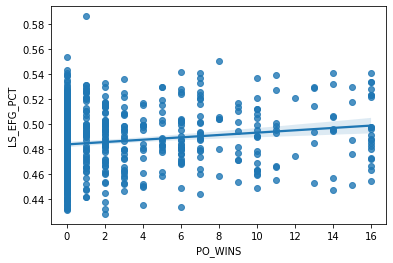

In [17]:
sns.regplot(data=plot_data,x='PO_WINS',y='LS_EFG_PCT',)
plt.show()

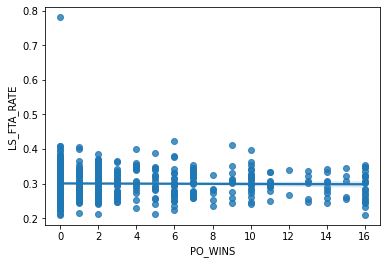

In [18]:
sns.regplot(data=plot_data,x='PO_WINS',y='LS_FTA_RATE',)
plt.show()

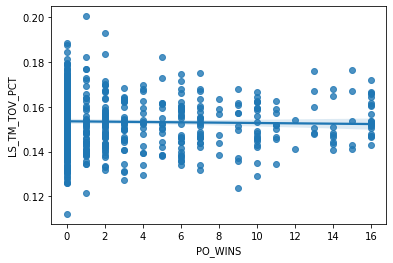

In [19]:
sns.regplot(data=plot_data,x='PO_WINS',y='LS_TM_TOV_PCT',)
plt.show()

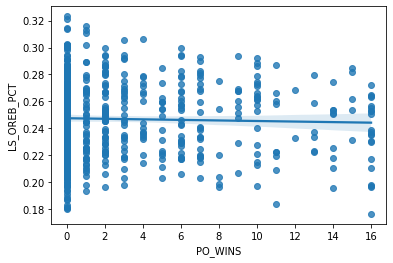

In [20]:
sns.regplot(data=plot_data,x='PO_WINS',y='LS_OREB_PCT',)
plt.show()

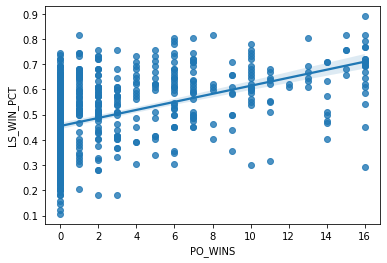

In [21]:
sns.regplot(data=plot_data,x='PO_WINS',y='LS_WIN_PCT',)
plt.show()

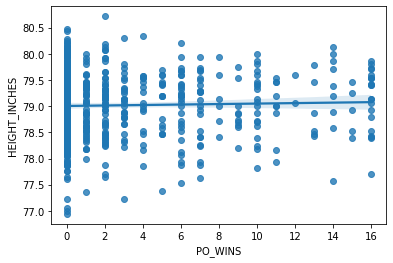

In [22]:
sns.regplot(data=plot_data,x='PO_WINS',y='HEIGHT_INCHES',)
plt.show()

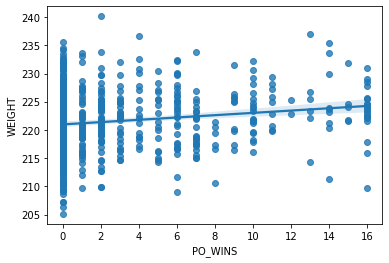

In [23]:
sns.regplot(data=plot_data,x='PO_WINS',y='WEIGHT',)
plt.show()

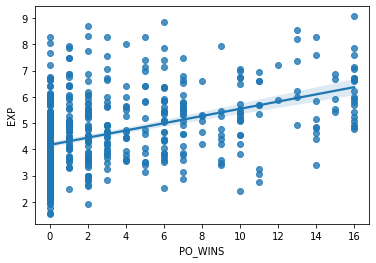

In [24]:
sns.regplot(data=plot_data,x='PO_WINS',y='EXP',)
plt.show()

In [25]:
# what if I try to attack this as a category problem 

In [26]:
def cats(w):
    w = float(w)
    if w<4:
        return 'R1/Lottery'
    elif 4<=w<8:
        return 'Second Round'
    elif 8<=w<12:
        return 'Conf. Finals'
    elif 12<=w<16:
        return 'Finals'
    elif w>15:
        return 'Champions'

In [27]:
plot_data['PO_WINS_CAT'] = [cats(x) for x in plot_data['PO_WINS']]

/var/folders/yr/8qkt_qm90r91jcgjnqdln_2c0000gn/T/ipykernel_78514/2466017058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['PO_WINS_CAT'] = [cats(x) for x in plot_data['PO_WINS']]


In [28]:
plot_data['PO_WINS_CAT'].value_counts(dropna=False).sort_values()

Champions        21
Finals           22
None             30
Conf. Finals     45
Second Round     88
R1/Lottery      481
Name: PO_WINS_CAT, dtype: int64

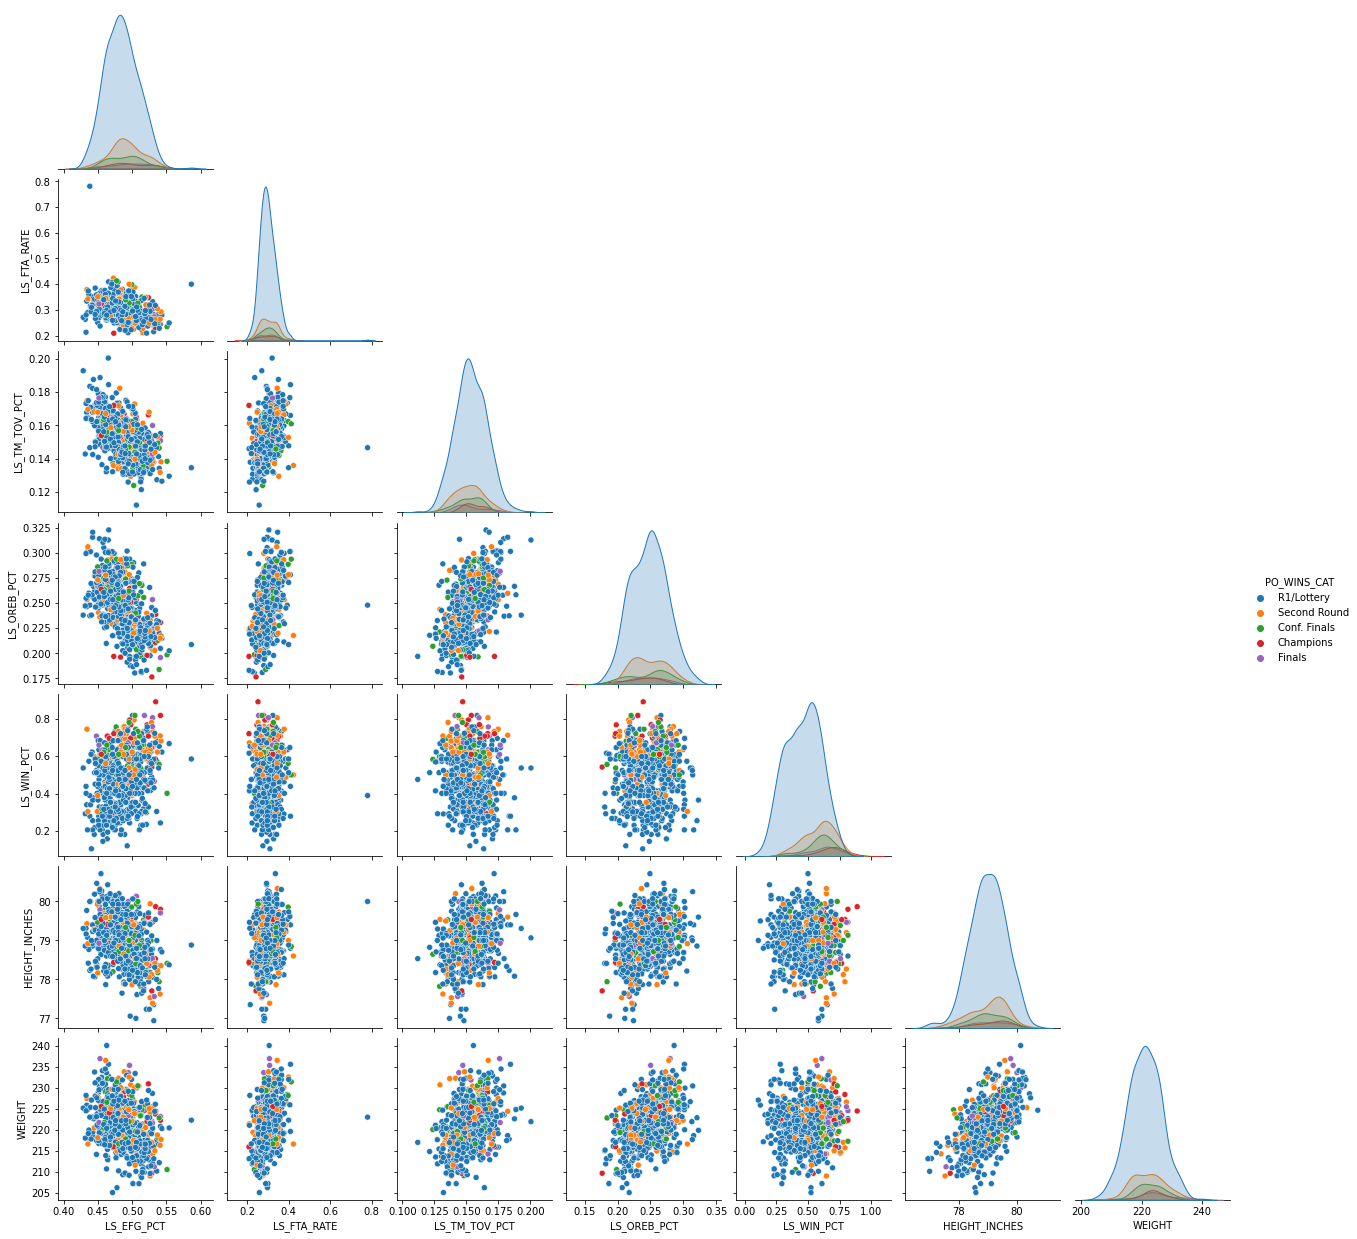

In [29]:
sns.pairplot(plot_data[['LS_EFG_PCT','LS_FTA_RATE','LS_TM_TOV_PCT','LS_OREB_PCT','LS_WIN_PCT','PO_WINS_CAT','HEIGHT_INCHES','WEIGHT']],hue='PO_WINS_CAT',corner=True)
plt.show()

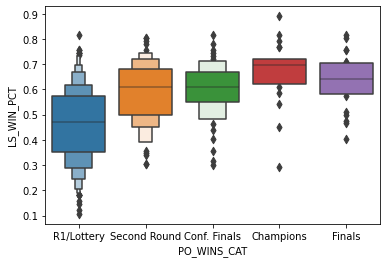

In [30]:
sns.boxenplot(data=plot_data,x='PO_WINS_CAT',y='LS_WIN_PCT')
plt.show()

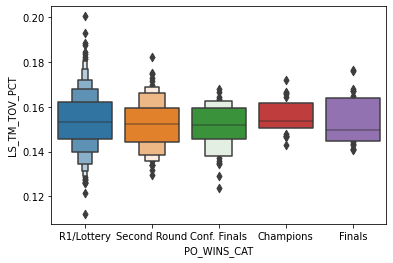

In [31]:
sns.boxenplot(data=plot_data,x='PO_WINS_CAT',y='LS_TM_TOV_PCT')
plt.show()

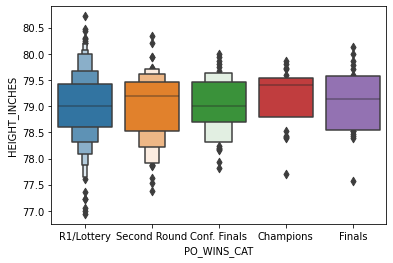

In [32]:
sns.boxenplot(data=plot_data,x='PO_WINS_CAT',y='HEIGHT_INCHES')
plt.show()

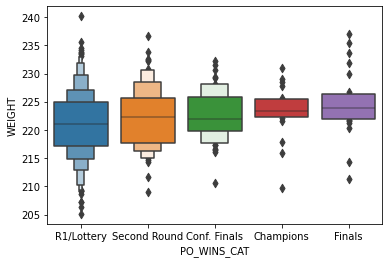

In [33]:
sns.boxenplot(data=plot_data,x='PO_WINS_CAT',y='WEIGHT')
plt.show()

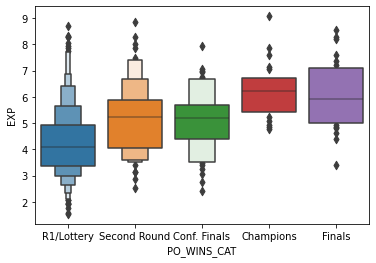

In [34]:
sns.boxenplot(data=plot_data,x='PO_WINS_CAT',y='EXP')
plt.show()

In [35]:
plot_data.to_csv('modeling_data_sample.csv',index=False)

In [36]:
plot_data['PO_WINS_CAT']

1      R1/Lottery
2      R1/Lottery
3      R1/Lottery
4      R1/Lottery
5      R1/Lottery
          ...    
711    R1/Lottery
712    R1/Lottery
713    R1/Lottery
714    R1/Lottery
715          None
Name: PO_WINS_CAT, Length: 687, dtype: object